<a href="https://colab.research.google.com/github/Vasu050/Brain-Tumour-Segmentation/blob/main/work_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

In [ ]:

awsaf49_brats20_dataset_training_validation_path = kagglehub.dataset_download('awsaf49/brats20-dataset-training-validation')
animelover72_monai_offline_path = kagglehub.dataset_download('animelover72/monai-offline')

print('Data source import complete.')

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


100%|██████████| 959M/959M [00:10<00:00, 100MB/s] 

Extracting files...


Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
!pip install -q nibabel
#!pip install -q git+https://github.com/Project-MONAI/MONAI#egg=monai
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/'
flair = nib.load(path + 'BraTS20_Training_001_flair.nii').get_fdata()
t1 = nib.load(path + 'BraTS20_Training_001_t1.nii').get_fdata()
t1ce = nib.load(path + 'BraTS20_Training_001_t1ce.nii').get_fdata()
t2 = nib.load(path + 'BraTS20_Training_001_t2.nii').get_fdata()
seg = nib.load(path + 'BraTS20_Training_001_seg.nii').get_fdata()
print("FLAIR shape:", flair.shape)
print("T1 shape:", t1.shape)
print("T1ce shape:", t1ce.shape)
print("T2 shape:", t2.shape)
print("Segmentation shape:", seg.shape)


FLAIR shape: (240, 240, 155)
T1 shape: (240, 240, 155)
T1ce shape: (240, 240, 155)
T2 shape: (240, 240, 155)
Segmentation shape: (240, 240, 155)


Shape of the image data: (240, 240, 155)


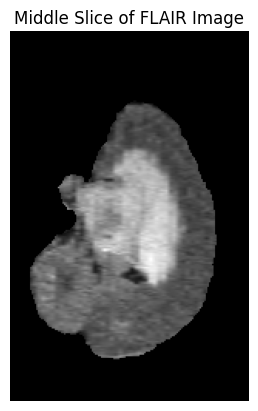

In [ ]:

# Step 1: Define the correct file path to your image
file_path = '/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'

# Step 2: Load the image data using nibabel
img = nib.load(file_path)

# Step 3: Convert it to a NumPy array
img_data = img.get_fdata()

# Step 4: Display the shape of the image to understand the dimensions (depth, height, width)
print("Shape of the image data:", img_data.shape) # pixelxpixelxdepth ,depth is no. fo slices

# Step 5: Pick a slice to visualize (for example, middle slice along the z-axis)
slice_num = img_data.shape[2] // 2  # Choose the middle slice

# Step 6: Visualize the slice using matplotlib
plt.imshow(img_data[100, :, :], cmap="gray")
plt.title("Middle Slice of FLAIR Image")
plt.axis("off")
plt.show()


In [ ]:

import os
import nibabel as nib
import numpy as np
from tqdm import tqdm
import gc  # for memory cleanup

# Base path to your dataset
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"

# Output directory to save processed .npz files
save_dir = "/kaggle/working/processed_data"
os.makedirs(save_dir, exist_ok=True)

# List all patient folders
patient_dirs = sorted(os.listdir(base_path))

# Modalities you want to load
modalities = ['flair', 't1', 't1ce', 't2']

# Function to normalize MRI volume
def normalize(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    if std == 0:
        return volume  # avoid division by zero
    return (volume - mean) / std

# Loop through each patient folder
for patient_id in tqdm(patient_dirs):
    patient_path = os.path.join(base_path, patient_id)

    try:
        volumes = []
        for mod in modalities:
            path = os.path.join(patient_path, f"{patient_id}_{mod}.nii")
            img = nib.load(path).get_fdata()
            volumes.append(normalize(img))

        # Load segmentation mask (no normalization)
        seg_path = os.path.join(patient_path, f"{patient_id}_seg.nii")
        seg = nib.load(seg_path).get_fdata()

        # Save to .npz file
        output_path = os.path.join(save_dir, f"{patient_id}.npz")
        np.savez_compressed(output_path, input=np.stack(volumes), label=seg)

        # Free memory
        del volumes
        del seg
        gc.collect()
        print("done")
    except Exception as e:
        print(f"Skipping {patient_id} due to error: {e}")

  0%|          | 1/371 [00:05<33:36,  5.45s/it]

done


  1%|          | 2/371 [00:13<44:18,  7.20s/it]

done


  1%|          | 3/371 [00:21<44:04,  7.19s/it]

done


  1%|          | 4/371 [00:26<39:46,  6.50s/it]

done


  1%|▏         | 5/371 [00:31<37:14,  6.11s/it]

done


  2%|▏         | 6/371 [00:37<35:11,  5.79s/it]

done


  2%|▏         | 7/371 [00:42<35:21,  5.83s/it]

done


  2%|▏         | 8/371 [00:48<33:58,  5.62s/it]

done


  2%|▏         | 9/371 [00:53<34:05,  5.65s/it]

done


  3%|▎         | 10/371 [00:58<32:38,  5.43s/it]

done


  3%|▎         | 11/371 [01:03<31:57,  5.33s/it]

done


  3%|▎         | 12/371 [01:09<32:39,  5.46s/it]

done


  4%|▎         | 13/371 [01:14<31:56,  5.35s/it]

done


  4%|▍         | 14/371 [01:20<33:03,  5.56s/it]

done


  4%|▍         | 15/371 [01:25<32:01,  5.40s/it]

done


  4%|▍         | 16/371 [01:31<31:53,  5.39s/it]

done


  5%|▍         | 17/371 [01:36<31:31,  5.34s/it]

done


  5%|▍         | 18/371 [01:42<32:17,  5.49s/it]

done


  5%|▌         | 19/371 [01:47<32:06,  5.47s/it]

done


  5%|▌         | 20/371 [01:52<31:24,  5.37s/it]

done


  6%|▌         | 21/371 [01:58<31:59,  5.49s/it]

done


  6%|▌         | 22/371 [02:03<30:58,  5.32s/it]

done


  6%|▌         | 23/371 [02:08<30:39,  5.29s/it]

done


  6%|▋         | 24/371 [02:14<30:35,  5.29s/it]

done


  7%|▋         | 25/371 [02:18<29:42,  5.15s/it]

done


  7%|▋         | 26/371 [02:24<31:11,  5.42s/it]

done


  7%|▋         | 27/371 [02:29<30:24,  5.30s/it]

done


  8%|▊         | 28/371 [02:35<31:09,  5.45s/it]

done


  8%|▊         | 29/371 [02:40<29:48,  5.23s/it]

done


  8%|▊         | 30/371 [02:45<29:20,  5.16s/it]

done


  8%|▊         | 31/371 [02:50<29:39,  5.23s/it]

done


  9%|▊         | 32/371 [02:55<29:04,  5.15s/it]

done


  9%|▉         | 33/371 [03:01<29:47,  5.29s/it]

done


  9%|▉         | 34/371 [03:06<28:58,  5.16s/it]

done


  9%|▉         | 35/371 [03:11<29:14,  5.22s/it]

done


 10%|▉         | 36/371 [03:16<28:49,  5.16s/it]

done


 10%|▉         | 37/371 [03:21<28:39,  5.15s/it]

done


 10%|█         | 38/371 [03:27<29:38,  5.34s/it]

done


 11%|█         | 39/371 [03:32<28:51,  5.22s/it]

done


 11%|█         | 40/371 [03:38<30:03,  5.45s/it]

done


 11%|█         | 41/371 [03:43<29:23,  5.34s/it]

done


 11%|█▏        | 42/371 [03:48<29:01,  5.29s/it]

done


 12%|█▏        | 43/371 [03:54<29:16,  5.36s/it]

done


 12%|█▏        | 44/371 [03:59<28:57,  5.31s/it]

done


 12%|█▏        | 45/371 [04:05<29:30,  5.43s/it]

done


 12%|█▏        | 46/371 [04:10<29:03,  5.36s/it]

done


 13%|█▎        | 47/371 [04:16<30:04,  5.57s/it]

done


 13%|█▎        | 48/371 [04:22<31:19,  5.82s/it]

done


 13%|█▎        | 49/371 [04:28<31:28,  5.87s/it]

done


 13%|█▎        | 50/371 [04:34<30:25,  5.69s/it]

done


 14%|█▎        | 51/371 [04:39<29:31,  5.54s/it]

done


 14%|█▍        | 52/371 [04:44<29:11,  5.49s/it]

done


 14%|█▍        | 53/371 [04:49<28:38,  5.41s/it]

done


 15%|█▍        | 54/371 [04:55<29:01,  5.49s/it]

done


 15%|█▍        | 55/371 [05:00<28:27,  5.40s/it]

done


 15%|█▌        | 56/371 [05:06<28:52,  5.50s/it]

done


 15%|█▌        | 57/371 [05:11<27:28,  5.25s/it]

done


 16%|█▌        | 58/371 [05:16<27:09,  5.21s/it]

done


 16%|█▌        | 59/371 [05:21<27:32,  5.30s/it]

done


 16%|█▌        | 60/371 [05:26<26:49,  5.17s/it]

done


 16%|█▋        | 61/371 [05:32<27:43,  5.37s/it]

done


 17%|█▋        | 62/371 [05:37<26:56,  5.23s/it]

done


 17%|█▋        | 63/371 [05:42<27:09,  5.29s/it]

done


 17%|█▋        | 64/371 [05:47<26:40,  5.21s/it]

done


 18%|█▊        | 65/371 [05:52<26:03,  5.11s/it]

done


 18%|█▊        | 66/371 [05:58<26:56,  5.30s/it]

done


 18%|█▊        | 67/371 [06:05<29:27,  5.81s/it]

done


 18%|█▊        | 68/371 [06:11<29:46,  5.90s/it]

done


 19%|█▊        | 69/371 [06:16<28:08,  5.59s/it]

done


 19%|█▉        | 70/371 [06:22<28:36,  5.70s/it]

done


 19%|█▉        | 71/371 [06:27<27:30,  5.50s/it]

done


 19%|█▉        | 72/371 [06:32<27:14,  5.47s/it]

done


 20%|█▉        | 73/371 [06:38<26:54,  5.42s/it]

done


 20%|█▉        | 74/371 [06:43<26:19,  5.32s/it]

done


 20%|██        | 75/371 [06:49<27:09,  5.50s/it]

done


 20%|██        | 76/371 [06:53<26:05,  5.31s/it]

done


 21%|██        | 77/371 [06:59<26:32,  5.42s/it]

done


 21%|██        | 78/371 [07:04<25:53,  5.30s/it]

done


 21%|██▏       | 79/371 [07:13<30:35,  6.28s/it]

done


 22%|██▏       | 80/371 [07:18<28:53,  5.96s/it]

done


 22%|██▏       | 81/371 [07:23<27:59,  5.79s/it]

done


 22%|██▏       | 82/371 [07:29<27:07,  5.63s/it]

done


 22%|██▏       | 83/371 [07:34<26:17,  5.48s/it]

done


 23%|██▎       | 84/371 [07:40<26:44,  5.59s/it]

done


 23%|██▎       | 85/371 [07:45<25:57,  5.45s/it]

done


 23%|██▎       | 86/371 [07:51<26:35,  5.60s/it]

done


 23%|██▎       | 87/371 [07:56<25:40,  5.42s/it]

done


 24%|██▎       | 88/371 [08:01<25:34,  5.42s/it]

done


 24%|██▍       | 89/371 [08:06<25:22,  5.40s/it]

done


 24%|██▍       | 90/371 [08:11<24:41,  5.27s/it]

done


 25%|██▍       | 91/371 [08:17<25:20,  5.43s/it]

done


 25%|██▍       | 92/371 [08:22<24:52,  5.35s/it]

done


 25%|██▌       | 93/371 [08:28<25:33,  5.52s/it]

done


 25%|██▌       | 94/371 [08:33<24:44,  5.36s/it]

done


 26%|██▌       | 95/371 [08:39<25:01,  5.44s/it]

done


 26%|██▌       | 96/371 [08:44<24:34,  5.36s/it]

done


 26%|██▌       | 97/371 [08:49<24:03,  5.27s/it]

done


 26%|██▋       | 98/371 [08:55<24:45,  5.44s/it]

done


 27%|██▋       | 99/371 [09:00<24:24,  5.39s/it]

done


 27%|██▋       | 100/371 [09:06<24:45,  5.48s/it]

done


 27%|██▋       | 101/371 [09:11<24:06,  5.36s/it]

done


 27%|██▋       | 102/371 [09:16<24:01,  5.36s/it]

done


 28%|██▊       | 103/371 [09:22<23:58,  5.37s/it]

done


 28%|██▊       | 104/371 [09:27<23:52,  5.36s/it]

done


 28%|██▊       | 105/371 [09:33<24:09,  5.45s/it]

done


 29%|██▊       | 106/371 [09:38<23:23,  5.30s/it]

done


 29%|██▉       | 107/371 [09:43<23:57,  5.45s/it]

done


 29%|██▉       | 108/371 [09:49<24:19,  5.55s/it]

done


 29%|██▉       | 109/371 [09:58<28:55,  6.63s/it]

done


 30%|██▉       | 110/371 [10:04<26:58,  6.20s/it]

done


 30%|██▉       | 111/371 [10:10<26:41,  6.16s/it]

done


 30%|███       | 112/371 [10:15<25:28,  5.90s/it]

done


 30%|███       | 113/371 [10:21<25:14,  5.87s/it]

done


 31%|███       | 114/371 [10:26<24:42,  5.77s/it]

done


 31%|███       | 115/371 [10:31<23:49,  5.58s/it]

done


 31%|███▏      | 116/371 [10:37<23:35,  5.55s/it]

done


 32%|███▏      | 117/371 [10:42<23:03,  5.45s/it]

done


 32%|███▏      | 118/371 [10:48<23:36,  5.60s/it]

done


 32%|███▏      | 119/371 [10:53<22:56,  5.46s/it]

done


 32%|███▏      | 120/371 [10:59<23:42,  5.67s/it]

done


 33%|███▎      | 121/371 [11:05<23:09,  5.56s/it]

done


 33%|███▎      | 122/371 [11:10<22:43,  5.47s/it]

done


 33%|███▎      | 123/371 [11:16<22:49,  5.52s/it]

done


 33%|███▎      | 124/371 [11:21<22:09,  5.38s/it]

done


 34%|███▎      | 125/371 [11:27<22:46,  5.56s/it]

done


 34%|███▍      | 126/371 [11:32<22:10,  5.43s/it]

done


 34%|███▍      | 127/371 [11:38<22:52,  5.63s/it]

done


 35%|███▍      | 128/371 [11:43<22:07,  5.46s/it]

done


 35%|███▍      | 129/371 [11:49<22:10,  5.50s/it]

done


 35%|███▌      | 130/371 [11:54<21:46,  5.42s/it]

done


 35%|███▌      | 131/371 [11:59<21:23,  5.35s/it]

done


 36%|███▌      | 132/371 [12:05<21:55,  5.51s/it]

done


 36%|███▌      | 133/371 [12:10<21:09,  5.33s/it]

done


 36%|███▌      | 134/371 [12:16<21:39,  5.48s/it]

done


 36%|███▋      | 135/371 [12:21<21:06,  5.37s/it]

done


 37%|███▋      | 136/371 [12:26<21:21,  5.45s/it]

done


 37%|███▋      | 137/371 [12:32<21:07,  5.42s/it]

done


 37%|███▋      | 138/371 [12:37<20:24,  5.26s/it]

done


 37%|███▋      | 139/371 [12:42<20:58,  5.42s/it]

done


 38%|███▊      | 140/371 [12:47<20:28,  5.32s/it]

done


 38%|███▊      | 141/371 [12:53<21:04,  5.50s/it]

done


 38%|███▊      | 142/371 [12:58<20:34,  5.39s/it]

done


 39%|███▊      | 143/371 [13:04<20:44,  5.46s/it]

done


 39%|███▉      | 144/371 [13:10<20:39,  5.46s/it]

done


 39%|███▉      | 145/371 [13:15<20:09,  5.35s/it]

done


 39%|███▉      | 146/371 [13:20<20:16,  5.41s/it]

done


 40%|███▉      | 147/371 [13:25<19:49,  5.31s/it]

done


 40%|███▉      | 148/371 [13:31<20:22,  5.48s/it]

done


 40%|████      | 149/371 [13:36<20:02,  5.42s/it]

done


 40%|████      | 150/371 [13:42<19:57,  5.42s/it]

done


 41%|████      | 151/371 [13:47<19:37,  5.35s/it]

done


 41%|████      | 152/371 [13:52<19:13,  5.27s/it]

done


 41%|████      | 153/371 [13:58<19:45,  5.44s/it]

done


 42%|████▏     | 154/371 [14:03<19:35,  5.42s/it]

done


 42%|████▏     | 155/371 [14:09<20:00,  5.56s/it]

done


 42%|████▏     | 156/371 [14:14<19:36,  5.47s/it]

done


 42%|████▏     | 157/371 [14:20<20:03,  5.62s/it]

done


 43%|████▎     | 158/371 [14:25<19:12,  5.41s/it]

done


 43%|████▎     | 159/371 [14:30<18:37,  5.27s/it]

done


 43%|████▎     | 160/371 [14:36<18:42,  5.32s/it]

done


 43%|████▎     | 161/371 [14:41<18:26,  5.27s/it]

done


 44%|████▎     | 162/371 [14:47<18:44,  5.38s/it]

done


 44%|████▍     | 163/371 [14:52<18:13,  5.26s/it]

done


 44%|████▍     | 164/371 [14:57<18:20,  5.32s/it]

done


 44%|████▍     | 165/371 [15:02<17:54,  5.22s/it]

done


 45%|████▍     | 166/371 [15:07<17:27,  5.11s/it]

done


 45%|████▌     | 167/371 [15:12<17:50,  5.25s/it]

done


 45%|████▌     | 168/371 [15:17<17:34,  5.19s/it]

done


 46%|████▌     | 169/371 [15:24<18:21,  5.45s/it]

done


 46%|████▌     | 170/371 [15:28<17:47,  5.31s/it]

done


 46%|████▌     | 171/371 [15:34<17:38,  5.29s/it]

done


 46%|████▋     | 172/371 [15:39<17:39,  5.32s/it]

done


 47%|████▋     | 173/371 [15:44<17:17,  5.24s/it]

done


 47%|████▋     | 174/371 [15:50<17:30,  5.33s/it]

done


 47%|████▋     | 175/371 [15:55<16:56,  5.18s/it]

done


 47%|████▋     | 176/371 [16:01<17:37,  5.42s/it]

done


 48%|████▊     | 177/371 [16:06<17:06,  5.29s/it]

done


 48%|████▊     | 178/371 [16:11<16:44,  5.21s/it]

done


 48%|████▊     | 179/371 [16:16<16:46,  5.24s/it]

done


 49%|████▊     | 180/371 [16:21<16:24,  5.15s/it]

done


 49%|████▉     | 181/371 [16:27<16:49,  5.32s/it]

done


 49%|████▉     | 182/371 [16:32<16:29,  5.24s/it]

done


 49%|████▉     | 183/371 [16:37<16:24,  5.24s/it]

done


 50%|████▉     | 184/371 [16:42<16:15,  5.22s/it]

done


 50%|████▉     | 185/371 [16:47<16:09,  5.21s/it]

done


 50%|█████     | 186/371 [16:53<16:30,  5.35s/it]

done


 50%|█████     | 187/371 [16:58<16:00,  5.22s/it]

done


 51%|█████     | 188/371 [17:03<16:23,  5.38s/it]

done


 51%|█████     | 189/371 [17:09<16:01,  5.28s/it]

done


 51%|█████     | 190/371 [17:13<15:36,  5.17s/it]

done


 51%|█████▏    | 191/371 [17:19<15:36,  5.20s/it]

done


 52%|█████▏    | 192/371 [17:24<15:13,  5.10s/it]

done


 52%|█████▏    | 193/371 [17:30<16:02,  5.41s/it]

done


 52%|█████▏    | 194/371 [17:35<15:30,  5.25s/it]

done


 53%|█████▎    | 195/371 [17:41<15:58,  5.44s/it]

done


 53%|█████▎    | 196/371 [17:45<15:27,  5.30s/it]

done


 53%|█████▎    | 197/371 [17:50<15:06,  5.21s/it]

done


 53%|█████▎    | 198/371 [17:56<15:14,  5.29s/it]

done


 54%|█████▎    | 199/371 [18:01<14:53,  5.20s/it]

done


 54%|█████▍    | 200/371 [18:07<15:18,  5.37s/it]

done


 54%|█████▍    | 201/371 [18:12<14:51,  5.25s/it]

done


 54%|█████▍    | 202/371 [18:17<14:54,  5.29s/it]

done


 55%|█████▍    | 203/371 [18:22<14:41,  5.25s/it]

done


 55%|█████▍    | 204/371 [18:27<14:26,  5.19s/it]

done


 55%|█████▌    | 205/371 [18:33<14:58,  5.41s/it]

done


 56%|█████▌    | 206/371 [18:38<14:21,  5.22s/it]

done


 56%|█████▌    | 207/371 [18:44<14:56,  5.47s/it]

done


 56%|█████▌    | 208/371 [18:49<14:29,  5.34s/it]

done


 56%|█████▋    | 209/371 [18:54<14:17,  5.29s/it]

done


 57%|█████▋    | 210/371 [18:59<14:09,  5.27s/it]

done


 57%|█████▋    | 211/371 [19:04<13:50,  5.19s/it]

done


 57%|█████▋    | 212/371 [19:10<14:18,  5.40s/it]

done


 57%|█████▋    | 213/371 [19:15<13:58,  5.31s/it]

done


 58%|█████▊    | 214/371 [19:21<13:57,  5.33s/it]

done


 58%|█████▊    | 215/371 [19:26<13:30,  5.20s/it]

done


 58%|█████▊    | 216/371 [19:31<13:11,  5.11s/it]

done


 58%|█████▊    | 217/371 [19:36<13:32,  5.28s/it]

done


 59%|█████▉    | 218/371 [19:41<13:11,  5.17s/it]

done


 59%|█████▉    | 219/371 [19:47<13:33,  5.35s/it]

done


 59%|█████▉    | 220/371 [19:52<13:19,  5.30s/it]

done


 60%|█████▉    | 221/371 [19:57<13:16,  5.31s/it]

done


 60%|█████▉    | 222/371 [20:08<17:22,  7.00s/it]

done


 60%|██████    | 223/371 [20:14<16:04,  6.52s/it]

done


 60%|██████    | 224/371 [20:19<15:17,  6.24s/it]

done


 61%|██████    | 225/371 [20:25<14:22,  5.91s/it]

done


 61%|██████    | 226/371 [20:31<14:23,  5.95s/it]

done


 61%|██████    | 227/371 [20:36<13:39,  5.69s/it]

done


 61%|██████▏   | 228/371 [20:41<13:32,  5.68s/it]

done


 62%|██████▏   | 229/371 [20:46<13:00,  5.49s/it]

done


 62%|██████▏   | 230/371 [20:51<12:33,  5.34s/it]

done


 62%|██████▏   | 231/371 [20:57<12:41,  5.44s/it]

done


 63%|██████▎   | 232/371 [21:02<12:22,  5.34s/it]

done


 63%|██████▎   | 233/371 [21:08<12:38,  5.50s/it]

done


 63%|██████▎   | 234/371 [21:13<12:20,  5.41s/it]

done


 63%|██████▎   | 235/371 [21:19<12:27,  5.50s/it]

done


 64%|██████▎   | 236/371 [21:24<12:11,  5.42s/it]

done


 64%|██████▍   | 237/371 [21:29<11:58,  5.36s/it]

done


 64%|██████▍   | 238/371 [21:35<12:03,  5.44s/it]

done


 64%|██████▍   | 239/371 [21:40<11:46,  5.35s/it]

done


 65%|██████▍   | 240/371 [21:46<12:03,  5.53s/it]

done


 65%|██████▍   | 241/371 [21:51<11:43,  5.41s/it]

done


 65%|██████▌   | 242/371 [21:57<11:46,  5.48s/it]

done


 65%|██████▌   | 243/371 [22:02<11:29,  5.38s/it]

done


 66%|██████▌   | 244/371 [22:07<11:15,  5.32s/it]

done


 66%|██████▌   | 245/371 [22:13<11:19,  5.39s/it]

done


 66%|██████▋   | 246/371 [22:18<10:53,  5.23s/it]

done


 67%|██████▋   | 247/371 [22:23<11:06,  5.37s/it]

done


 67%|██████▋   | 248/371 [22:28<10:46,  5.26s/it]

done


 67%|██████▋   | 249/371 [22:33<10:33,  5.19s/it]

done


 67%|██████▋   | 250/371 [22:39<10:32,  5.23s/it]

done


 68%|██████▊   | 251/371 [22:44<10:13,  5.11s/it]

done


 68%|██████▊   | 252/371 [22:49<10:36,  5.35s/it]

done


 68%|██████▊   | 253/371 [22:54<10:17,  5.23s/it]

done


 68%|██████▊   | 254/371 [23:00<10:23,  5.33s/it]

done


 69%|██████▊   | 255/371 [23:05<10:04,  5.21s/it]

done


 69%|██████▉   | 256/371 [23:10<09:54,  5.17s/it]

done


 69%|██████▉   | 257/371 [23:16<10:09,  5.35s/it]

done


 70%|██████▉   | 258/371 [23:21<09:46,  5.19s/it]

done


 70%|██████▉   | 259/371 [23:26<09:55,  5.32s/it]

done


 70%|███████   | 260/371 [23:31<09:39,  5.22s/it]

done


 70%|███████   | 261/371 [23:36<09:29,  5.18s/it]

done


 71%|███████   | 262/371 [23:42<09:34,  5.27s/it]

done


 71%|███████   | 263/371 [23:47<09:25,  5.23s/it]

done


 71%|███████   | 264/371 [23:53<09:40,  5.43s/it]

done


 71%|███████▏  | 265/371 [23:58<09:22,  5.31s/it]

done


 72%|███████▏  | 266/371 [24:04<09:34,  5.47s/it]

done


 72%|███████▏  | 267/371 [24:09<09:15,  5.34s/it]

done


 72%|███████▏  | 268/371 [24:14<09:08,  5.32s/it]

done


 73%|███████▎  | 269/371 [24:19<08:59,  5.29s/it]

done


 73%|███████▎  | 270/371 [24:24<08:43,  5.19s/it]

done


 73%|███████▎  | 271/371 [24:30<08:52,  5.33s/it]

done


 73%|███████▎  | 272/371 [24:35<08:38,  5.23s/it]

done


 74%|███████▎  | 273/371 [24:40<08:42,  5.34s/it]

done


 74%|███████▍  | 274/371 [24:45<08:27,  5.23s/it]

done


 74%|███████▍  | 275/371 [24:50<08:10,  5.11s/it]

done


 74%|███████▍  | 276/371 [24:56<08:21,  5.28s/it]

done


 75%|███████▍  | 277/371 [25:02<08:45,  5.59s/it]

done


 75%|███████▍  | 278/371 [25:08<08:38,  5.58s/it]

done


 75%|███████▌  | 279/371 [25:13<08:19,  5.43s/it]

done


 75%|███████▌  | 280/371 [25:18<08:19,  5.49s/it]

done


 76%|███████▌  | 281/371 [25:23<08:01,  5.35s/it]

done


 76%|███████▌  | 282/371 [25:28<07:45,  5.23s/it]

done


 76%|███████▋  | 283/371 [25:34<07:47,  5.31s/it]

done


 77%|███████▋  | 284/371 [25:39<07:37,  5.26s/it]

done


 77%|███████▋  | 285/371 [25:45<07:41,  5.36s/it]

done


 77%|███████▋  | 286/371 [25:50<07:26,  5.25s/it]

done


 77%|███████▋  | 287/371 [25:55<07:19,  5.23s/it]

done


 78%|███████▊  | 288/371 [26:00<07:16,  5.25s/it]

done


 78%|███████▊  | 289/371 [26:05<07:01,  5.15s/it]

done


 78%|███████▊  | 290/371 [26:11<07:13,  5.35s/it]

done


 78%|███████▊  | 291/371 [26:16<07:01,  5.27s/it]

done


 79%|███████▊  | 292/371 [26:22<07:09,  5.43s/it]

done


 79%|███████▉  | 293/371 [26:27<06:54,  5.31s/it]

done


 79%|███████▉  | 294/371 [26:32<06:52,  5.36s/it]

done


 80%|███████▉  | 295/371 [26:37<06:40,  5.26s/it]

done


 80%|███████▉  | 296/371 [26:42<06:28,  5.18s/it]

done


 80%|████████  | 297/371 [26:48<06:40,  5.41s/it]

done


 80%|████████  | 298/371 [26:53<06:29,  5.34s/it]

done


 81%|████████  | 299/371 [26:59<06:39,  5.55s/it]

done


 81%|████████  | 300/371 [27:04<06:22,  5.38s/it]

done


 81%|████████  | 301/371 [27:10<06:11,  5.30s/it]

done


 81%|████████▏ | 302/371 [27:15<06:04,  5.29s/it]

done


 82%|████████▏ | 303/371 [27:20<05:52,  5.18s/it]

done


 82%|████████▏ | 304/371 [27:25<05:55,  5.31s/it]

done


 82%|████████▏ | 305/371 [27:30<05:45,  5.23s/it]

done


 82%|████████▏ | 306/371 [27:36<05:50,  5.39s/it]

done


 83%|████████▎ | 307/371 [27:41<05:37,  5.27s/it]

done


 83%|████████▎ | 308/371 [27:46<05:26,  5.18s/it]

done


 83%|████████▎ | 309/371 [27:52<05:28,  5.30s/it]

done


 84%|████████▎ | 310/371 [27:57<05:21,  5.27s/it]

done


 84%|████████▍ | 311/371 [28:03<05:25,  5.42s/it]

done


 84%|████████▍ | 312/371 [28:07<05:08,  5.24s/it]

done


 84%|████████▍ | 313/371 [28:14<05:31,  5.71s/it]

done


 85%|████████▍ | 314/371 [28:19<05:13,  5.49s/it]

done


 85%|████████▍ | 315/371 [28:26<05:26,  5.83s/it]

done


 85%|████████▌ | 316/371 [28:32<05:23,  5.88s/it]

done


 85%|████████▌ | 317/371 [28:37<05:12,  5.78s/it]

done


 86%|████████▌ | 318/371 [28:43<04:58,  5.64s/it]

done


 86%|████████▌ | 319/371 [28:48<04:41,  5.42s/it]

done


 86%|████████▋ | 320/371 [28:54<04:45,  5.59s/it]

done


 87%|████████▋ | 321/371 [28:59<04:29,  5.40s/it]

done


 87%|████████▋ | 322/371 [29:04<04:30,  5.51s/it]

done


 87%|████████▋ | 323/371 [29:09<04:17,  5.37s/it]

done


 87%|████████▋ | 324/371 [29:15<04:14,  5.41s/it]

done


 88%|████████▊ | 325/371 [29:20<04:06,  5.36s/it]

done


 88%|████████▊ | 326/371 [29:25<03:55,  5.23s/it]

done


 88%|████████▊ | 327/371 [29:31<04:02,  5.50s/it]

done


 88%|████████▊ | 328/371 [29:36<03:52,  5.41s/it]

done


 89%|████████▊ | 329/371 [29:42<03:54,  5.58s/it]

done


 89%|████████▉ | 330/371 [29:47<03:42,  5.43s/it]

done


 89%|████████▉ | 331/371 [29:53<03:36,  5.40s/it]

done


 89%|████████▉ | 332/371 [29:58<03:33,  5.47s/it]

done


 90%|████████▉ | 333/371 [30:04<03:26,  5.42s/it]

done


 90%|█████████ | 334/371 [30:14<04:10,  6.78s/it]

done


 90%|█████████ | 335/371 [30:20<03:59,  6.64s/it]

done


 91%|█████████ | 336/371 [30:27<03:51,  6.61s/it]

done


 91%|█████████ | 337/371 [30:34<03:49,  6.75s/it]

done


 91%|█████████ | 338/371 [30:39<03:32,  6.44s/it]

done


 91%|█████████▏| 339/371 [30:46<03:29,  6.54s/it]

done


 92%|█████████▏| 340/371 [30:53<03:28,  6.72s/it]

done


 92%|█████████▏| 341/371 [31:00<03:24,  6.80s/it]

done


 92%|█████████▏| 342/371 [31:06<03:07,  6.47s/it]

done


 92%|█████████▏| 343/371 [31:13<03:08,  6.73s/it]

done


 93%|█████████▎| 344/371 [31:19<02:55,  6.49s/it]

done


 93%|█████████▎| 345/371 [31:26<02:53,  6.68s/it]

done


 93%|█████████▎| 346/371 [31:33<02:50,  6.81s/it]

done


 94%|█████████▎| 347/371 [31:39<02:38,  6.59s/it]

done


 94%|█████████▍| 348/371 [31:47<02:35,  6.76s/it]

done


 94%|█████████▍| 349/371 [31:52<02:21,  6.44s/it]

done


 94%|█████████▍| 350/371 [31:59<02:17,  6.57s/it]

done


 95%|█████████▍| 351/371 [32:05<02:07,  6.38s/it]

done


 95%|█████████▍| 352/371 [32:11<02:00,  6.37s/it]

done


 95%|█████████▌| 353/371 [32:18<01:52,  6.28s/it]

done


 95%|█████████▌| 354/371 [32:25<01:52,  6.60s/it]

done


 96%|█████████▌| 355/371 [32:26<01:20,  5.06s/it]

Skipping BraTS20_Training_355 due to error: No such file or no access: '/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_seg.nii'


 96%|█████████▌| 356/371 [32:32<01:20,  5.38s/it]

done


 96%|█████████▌| 357/371 [32:39<01:20,  5.73s/it]

done


 96%|█████████▋| 358/371 [32:45<01:13,  5.68s/it]

done


 97%|█████████▋| 359/371 [32:51<01:11,  5.97s/it]

done


 97%|█████████▋| 360/371 [32:57<01:04,  5.88s/it]

done


 97%|█████████▋| 361/371 [33:04<01:01,  6.20s/it]

done


 98%|█████████▊| 362/371 [33:11<00:58,  6.45s/it]

done


 98%|█████████▊| 363/371 [33:17<00:50,  6.32s/it]

done


 98%|█████████▊| 364/371 [33:23<00:44,  6.30s/it]

done


 98%|█████████▊| 365/371 [33:30<00:38,  6.46s/it]

done


 99%|█████████▊| 366/371 [33:35<00:30,  6.04s/it]

done


 99%|█████████▉| 367/371 [33:42<00:25,  6.41s/it]

done


 99%|█████████▉| 368/371 [33:49<00:19,  6.41s/it]

done


100%|██████████| 371/371 [33:56<00:00,  5.49s/it]

done
Skipping name_mapping.csv due to error: No such file or no access: '/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/name_mapping.csv/name_mapping.csv_flair.nii'
Skipping survival_info.csv due to error: No such file or no access: '/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/survival_info.csv/survival_info.csv_flair.nii'


In [ ]:

import os, random, numpy as np, torch
from torch.utils.data import Dataset

class BrainTumorRandomCropDataset(Dataset):
    def __init__(self, npz_files, crop_size=(64, 64, 64)):
        self.npz_files = npz_files
        self.crop_size = crop_size

    def __len__(self):
        return len(self.npz_files)

    def random_crop_3d(self, img, label):
        _, D, H, W = img.shape
        cd, ch, cw = self.crop_size
        d = random.randint(0, D - cd)
        h = random.randint(0, H - ch)
        w = random.randint(0, W - cw)
        return img[:, d:d+cd, h:h+ch, w:w+cw], label[d:d+cd, h:h+ch, w:w+cw]

    def __getitem__(self, idx):
        data = np.load(self.npz_files[idx])
        image, label = data['input'], data['label']
        image, label = self.random_crop_3d(image, label)
        label = np.expand_dims(label, axis=0)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


In [ ]:

from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import os


In [ ]:

'''# Load file paths (limit to 3 for testing)
npz_dir = "/kaggle/working/processed_data"
npz_files = sorted([os.path.join(npz_dir, f) for f in os.listdir(npz_dir) if f.endswith(".npz")])[:3]  # load only 3 patients for testing

# Initialize Dataset and DataLoader
dataset = BrainTumorRandomCropDataset(npz_files, crop_size=(64, 64, 64)) # can change ()

train_loader = DataLoader(
    dataset,
    batch_size=1,          # Low batch size to save memory
    shuffle=True,          # Shuffle to improve training
    num_workers=0,         # No extra workers to save memory
    pin_memory=False       # No need for pinning memory as we are not using GPU
)'''

'# Load file paths (limit to 3 for testing)\nnpz_dir = "/kaggle/working/processed_data"\nnpz_files = sorted([os.path.join(npz_dir, f) for f in os.listdir(npz_dir) if f.endswith(".npz")])[:3]  # load only 3 patients for testing\n\n# Initialize Dataset and DataLoader\ndataset = BrainTumorRandomCropDataset(npz_files, crop_size=(64, 64, 64)) # can change ()\n\ntrain_loader = DataLoader(\n    dataset,\n    batch_size=1,          # Low batch size to save memory\n    shuffle=True,          # Shuffle to improve training\n    num_workers=0,         # No extra workers to save memory\n    pin_memory=False       # No need for pinning memory as we are not using GPU\n)'

In [ ]:

# Define UNet3D Model
class UNet3D(nn.Module):
    def __init__(self, in_channels=4, out_channels=1):
        super(UNet3D, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv3d(in_channels, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, 16, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv3d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, out_channels, kernel_size=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x




In [ ]:
from pathlib import Path
from torch.utils.data import DataLoader

# Initialize model, loss function, and optimizer
model = UNet3D(in_channels=4, out_channels=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Explicitly set to CPU

model = model.to(device)
#model.load_state_dict(torch.load("unet3d_chunk3.pth"))
criterion = nn.BCEWithLogitsLoss()  # For binary segmentation
optimizer = optim.Adam(model.parameters(), lr=1e-4)

npz_dir = Path("/kaggle/working/processed_data")
all_npz_files = sorted(npz_dir.glob("*.npz"))

chunk_size = 10             # Number of patients to load at a time
total_epochs = 2
epochs_per_chunk = 2        # You can increase if needed

# Training loop over chunks
for epoch in range(total_epochs):  # Now it will loop over all epochs
  for chunk_start in range(0, len(all_npz_files), chunk_size):
    chunk_files = all_npz_files[chunk_start : chunk_start + chunk_size]

    print(f"Processing patients {chunk_start} to {chunk_start + len(chunk_files) - 1}")

    dataset = BrainTumorRandomCropDataset(chunk_files, crop_size=(64, 64, 64))
    train_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)

    for epoch in range(epochs_per_chunk):
        total_loss = 0
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            avg_loss = total_loss / len(train_loader) if len(train_loader) > 0 else 0
            print(f"Chunk {chunk_start//chunk_size + 1}, Epoch {epoch+1} complete. Avg Loss: {avg_loss:.4f}")
        print(f"Chunk {chunk_start//chunk_size + 1}, Epoch {epoch+1} complete. Avg Loss: {total_loss / len(train_loader):.4f}")
        print(f"Epoch {epoch+1} complete for chunk {chunk_start//chunk_size + 1}")

    torch.save(model.state_dict(), f"unet3d_chunk{chunk_start//chunk_size + 1}.pth")
    torch.cuda.empty_cache()  # Optional: free GPU memory

Processing patients 0 to 9
Chunk 1, Epoch 1 complete. Avg Loss: 0.0714
Chunk 1, Epoch 1 complete. Avg Loss: 0.1416
Chunk 1, Epoch 1 complete. Avg Loss: 0.2119
Chunk 1, Epoch 1 complete. Avg Loss: 0.2820
Chunk 1, Epoch 1 complete. Avg Loss: 0.3515
Chunk 1, Epoch 1 complete. Avg Loss: 0.4212
Chunk 1, Epoch 1 complete. Avg Loss: 0.4914
Chunk 1, Epoch 1 complete. Avg Loss: 0.5614
Chunk 1, Epoch 1 complete. Avg Loss: 0.6307
Chunk 1, Epoch 1 complete. Avg Loss: 0.6997
Chunk 1, Epoch 1 complete. Avg Loss: 0.6997
Epoch 1 complete for chunk 1
Chunk 1, Epoch 2 complete. Avg Loss: 0.0675
Chunk 1, Epoch 2 complete. Avg Loss: 0.1361
Chunk 1, Epoch 2 complete. Avg Loss: 0.2046
Chunk 1, Epoch 2 complete. Avg Loss: 0.2734
Chunk 1, Epoch 2 complete. Avg Loss: 0.3425
Chunk 1, Epoch 2 complete. Avg Loss: 0.4101
Chunk 1, Epoch 2 complete. Avg Loss: 0.4784
Chunk 1, Epoch 2 complete. Avg Loss: 0.5465
Chunk 1, Epoch 2 complete. Avg Loss: 0.6141
Chunk 1, Epoch 2 complete. Avg Loss: 0.6817
Chunk 1, Epoch 2 com

In [ ]:
import os
import numpy as np
import nibabel as nib
from pathlib import Path

validation_path = Path("/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData")

# Output directory to save processed .npz files
validation_output_dir = Path("/kaggle/working/validate_data")
os.makedirs(validation_output_dir, exist_ok=True)

modalities = ['flair', 't1', 't1ce', 't2']

for patient_dir in sorted(validation_path.glob("BraTS20_Validation_*")):
    patient_id = patient_dir.name
    print(f"Processing {patient_id}...")

    # Load modalities
    input_modalities = []
    for mod in modalities:
        file_path = patient_dir / f"{patient_id}_{mod}.nii"
        if not file_path.exists():
            print(f"Missing: {file_path}")
            break
        nii = nib.load(str(file_path))
        data = nii.get_fdata()  # shape: (H, W, D)
        data = np.transpose(data, (2, 0, 1))  # to shape: (D, H, W)
        input_modalities.append(data)

    if len(input_modalities) != 4:
        print(f"Skipping {patient_id} due to missing modality.")
        continue

    input_array = np.stack(input_modalities)  # shape: (4, D, H, W)

    # Try loading segmentation label (if exists)
    label_path = patient_dir / f"{patient_id}_seg.nii"
    if label_path.exists():
        label_data = nib.load(str(label_path)).get_fdata()
        label_data = np.transpose(label_data, (2, 0, 1))  # to shape: (D, H, W)
        label_data = label_data.astype(np.uint8)
    else:
        # If no label, use zeros (or skip saving 'label' key)
        label_data = np.zeros(input_array.shape[1:], dtype=np.uint8)

    # Save as .npz
    np.savez_compressed(validation_output_dir / f"{patient_id}.npz", input=input_array.astype(np.float32), label=label_data)
    print(f"Saved {patient_id}.npz")

print(" All done.")
val_npz_files = sorted(list(Path("/kaggle/working/validate_data").glob("*.npz")))

Processing BraTS20_Validation_001...
Saved BraTS20_Validation_001.npz
Processing BraTS20_Validation_002...
Saved BraTS20_Validation_002.npz
Processing BraTS20_Validation_003...
Saved BraTS20_Validation_003.npz
Processing BraTS20_Validation_004...
Saved BraTS20_Validation_004.npz
Processing BraTS20_Validation_005...
Saved BraTS20_Validation_005.npz
Processing BraTS20_Validation_006...
Saved BraTS20_Validation_006.npz
Processing BraTS20_Validation_007...
Saved BraTS20_Validation_007.npz
Processing BraTS20_Validation_008...
Saved BraTS20_Validation_008.npz
Processing BraTS20_Validation_009...
Saved BraTS20_Validation_009.npz
Processing BraTS20_Validation_010...
Saved BraTS20_Validation_010.npz
Processing BraTS20_Validation_011...
Saved BraTS20_Validation_011.npz
Processing BraTS20_Validation_012...
Saved BraTS20_Validation_012.npz
Processing BraTS20_Validation_013...
Saved BraTS20_Validation_013.npz
Processing BraTS20_Validation_014...
Saved BraTS20_Validation_014.npz
Processing BraTS20_V

In [ ]:
class BrainTumorRandomCropDataset(Dataset):
    def __init__(self, npz_files, crop_size=(64, 64, 64), training=True):
        self.npz_files = npz_files
        self.crop_size = crop_size
        self.training = training

    def __len__(self):
        return len(self.npz_files)

    def crop_3d(self, img, label):
        _, D, H, W = img.shape
        cd, ch, cw = self.crop_size

        if self.training:
            d = random.randint(0, D - cd)
            h = random.randint(0, H - ch)
            w = random.randint(0, W - cw)
        else:
            d = (D - cd) // 2
            h = (H - ch) // 2
            w = (W - cw) // 2

        return img[:, d:d+cd, h:h+ch, w:w+cw], label[d:d+cd, h:h+ch, w:w+cw]

    def __getitem__(self, idx):
        data = np.load(self.npz_files[idx])
        image, label = data['input'], data['label']
        image, label = self.crop_3d(image, label)
        label = np.expand_dims(label, axis=0)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


In [ ]:

# Define UNet3D Model
class UNet3D(nn.Module):
    def __init__(self, in_channels=4, out_channels=1):
        super(UNet3D, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv3d(in_channels, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, 16, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv3d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, out_channels, kernel_size=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x




In [ ]:
import torch
from torch.utils.data import DataLoader
val_dataset = BrainTumorRandomCropDataset(val_npz_files, crop_size=(64, 64, 64), training=False)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)


In [ ]:
def weights_init(m):
    if isinstance(m, torch.nn.Conv3d):
        torch.nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)

model.apply(weights_init)

UNet3D(
  (encoder): Sequential(
    (0): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Conv3d(16, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Conv3d(8, 1, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
)

In [ ]:
model.eval()
with torch.no_grad():
    for i,(images, labels) in enumerate(val_loader):
        outputs = model(images)
        print(f"\nBatch {i+1}")
        print(f"Image shape: {images.shape}")
        print(f"Label shape: {labels.shape}")
        print(f"Output shape: {outputs.shape}")
        print(f"Output stats - min: {outputs.min().item():.4f}, max: {outputs.max().item():.4f}, mean: {outputs.mean().item():.4f}")

        if i == 2:  # Check only first 3 batches
            break
        # Optional: Apply sigmoid if using BCEWithLogitsLoss
        # outputs = torch.sigmoid(outputs)

        # Add metric calculations here if needed



Batch 1
Image shape: torch.Size([1, 4, 64, 64, 64])
Label shape: torch.Size([1, 1, 64, 64, 64])
Output shape: torch.Size([1, 1, 64, 64, 64])
Output stats - min: -666.5145, max: 432.3740, mean: 7.8345

Batch 2
Image shape: torch.Size([1, 4, 64, 64, 64])
Label shape: torch.Size([1, 1, 64, 64, 64])
Output shape: torch.Size([1, 1, 64, 64, 64])
Output stats - min: -1047.6973, max: 784.2171, mean: -5.2903

Batch 3
Image shape: torch.Size([1, 4, 64, 64, 64])
Label shape: torch.Size([1, 1, 64, 64, 64])
Output shape: torch.Size([1, 1, 64, 64, 64])
Output stats - min: -1234.6504, max: 830.0245, mean: -6.4130


In [ ]:
print("Model loaded:", model)  # Confirm layers
for name, param in model.named_parameters():
    print(name, param.mean().item(), param.std().item())
outputs = torch.sigmoid(outputs)








print("After sigmoid - min:", outputs.min().item(), "max:", outputs.max().item(), "mean:", outputs.mean().item())
for param_group in optimizer.param_groups:
    print("Learning Rate:", param_group['lr'])


Model loaded: UNet3D(
  (encoder): Sequential(
    (0): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Conv3d(16, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU()
    (2): Conv3d(8, 1, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
)
encoder.0.weight 0.0008440327947027981 0.12822990119457245
encoder.0.bias 0.0 0.0
encoder.2.weight 0.0029967681039124727 0.09710142016410828
encoder.2.bias 0.0 0.0
decoder.0.weight -0.0020327523816376925 0.06947193294763565
decoder.0.bias 0.0 0.0
decoder.2.weight -0.06946735829114914 0.5678496360778809
decoder.2.bias 0.0 nan
After sigmoid - min: 0.5 max: 0.7310585975646973 mean: 0.6663309335708618
Learning Rate: 0.0001


<ipython-input-44-9ee03540dc7c>:3: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  print(name, param.mean().item(), param.std().item())


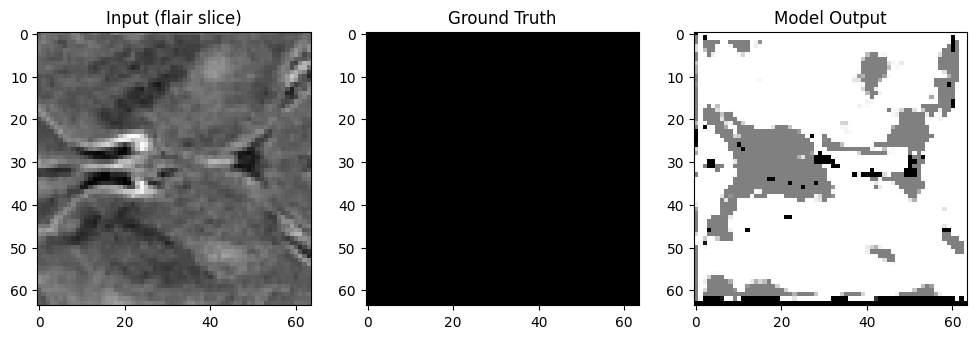

In [ ]:
import matplotlib.pyplot as plt

# Pick a central slice from the 3D volume
slice_idx = outputs.shape[2] // 2

# Convert tensors to numpy
image_np = images[0, 0].cpu().numpy()  # One modality
label_np = labels[0, 0, slice_idx].cpu().numpy()
output_np = outputs[0, 0, slice_idx].cpu().numpy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_np[slice_idx], cmap='gray')
plt.title("Input (flair slice)")

plt.subplot(1, 3, 2)
plt.imshow(label_np, cmap='gray')
plt.title("Ground Truth")

plt.subplot(1, 3, 3)
plt.imshow(output_np, cmap='gray')
plt.title("Model Output")

plt.show()


In [ ]:
def dice_score(pred, target, threshold=0.5):
    pred = (pred > threshold).float()
    smooth = 1e-5
    intersection = (pred * target).sum()
    return (2. * intersection) / (pred.sum() + target.sum() + smooth)

# Inside loop:
dice = dice_score(outputs, labels)
print(f"Dice score: {dice.item():.4f}")


Dice score: 0.0000


In [ ]:
'''import os, random, numpy as np, torch
from torch.utils.data import Dataset
import torch.nn as nn # Import torch.nn for neural network components

class BrainTumorRandomCropDataset(Dataset):
    def __init__(self, npz_files, crop_size=(64, 64, 64)):
        self.npz_files = npz_files
        self.crop_size = crop_size

    def __len__(self):
        return len(self.npz_files)

    def random_crop_3d(self, img, label):
        _, D, H, W = img.shape
        cd, ch, cw = self.crop_size
        d = random.randint(0, D - cd)
        h = random.randint(0, H - ch)
        w = random.randint(0, W - cw)
        return img[:, d:d+cd, h:h+ch, w:w+cw], label[d:d+cd, h:h+ch, w:w+cw]

    def __getitem__(self, idx):
        data = np.load(self.npz_files[idx])
        image, label = data['input'], data['label']
        image, label = self.random_crop_3d(image, label)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)'''

In [ ]:

'''# Training Loop
for epoch in range(2):  # Just 2 epochs for now for testing
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.unsqueeze(1).to(device)  # Ensure labels have correct shape

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} completed. Average Loss: {total_loss / len(train_loader):.4f}")
    torch.cuda.empty_cache()  # Only needed if using GPU
'''

In [ ]:
'''import os, random, numpy as np, torch
from torch.utils.data import Dataset, DataLoader # Import DataLoader
import torch.nn as nn # Import torch.nn for neural network components

# ... [Your BrainTumorRandomCropDataset class definition here] ...

# Load file paths (limit to 3 for testing)
npz_dir = "/kaggle/working/processed_data"
npz_files = sorted([os.path.join(npz_dir, f) for f in os.listdir(npz_dir) if f.endswith(".npz")])[:3]  # load only 3 patients for testing

# Initialize Dataset and DataLoader
dataset = BrainTumorRandomCropDataset(npz_files, crop_size=(64, 64, 64)) # can change ()

train_loader = DataLoader(
    dataset,
    batch_size=1,          # Low batch size to save memory
    shuffle=True,          # Shuffle to improve training
    num_workers=0,         # No extra workers to save memory
    pin_memory=False       # No need for pinning memory as we are not using GPU
)

# ... [Your UNet3D class and model initialization here] ...

# Training Loop
for epoch in range(2):  # Just 2 epochs for now for testing
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.unsqueeze(1).to(device)  # Ensure labels have correct shape

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} completed. Average Loss: {total_loss / len(train_loader):.4f}")
    torch.cuda.empty_cache()  # Only needed if using GPU'''

In [ ]:
'''import os
import nibabel as nib
import numpy as np
from tqdm import tqdm
import gc  # for memory cleanup

# Base path to your dataset
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"

# Output directory to save processed .npz files
save_dir = "/kaggle/working/processed_data"
os.makedirs(save_dir, exist_ok=True)

# List all patient folders
patient_dirs = sorted(os.listdir(base_path))

# Modalities you want to load
modalities = ['flair', 't1', 't1ce', 't2']

# Function to normalize MRI volume
def normalize(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    if std == 0:
        return volume  # avoid division by zero
    return (volume - mean) / std

# Loop through each patient folder
for patient_id in tqdm(patient_dirs):
    patient_path = os.path.join(base_path, patient_id)

import os
import nibabel as nib
import numpy as np
from tqdm import tqdm
import gc  # for memory cleanup

# Base path to your dataset
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"

# Output directory to save processed .npz files
save_dir = "/kaggle/working/processed_data"
os.makedirs(save_dir, exist_ok=True)

# List all patient folders
patient_dirs = sorted(os.listdir(base_path))

# Modalities you want to load
modalities = ['flair', 't1', 't1ce', 't2']

# Function to normalize MRI volume
def normalize(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    if std == 0:
        return volume  # avoid division by zero
    return (volume - mean) / std

# Loop through each patient folder
for patient_id in tqdm(patient_dirs):
    patient_path = os.path.join(base_path, patient_id)

    try:
        volumes = []
        for mod in modalities:
            path = os.path.join(patient_path, f"{patient_id}_{mod}.nii")
            img = nib.load(path)
            volumes.append(normalize(img.get_fdata()))
    except Exception as e:
        print(f"Error processing {patient_id}: {e}")
        continue
from tqdm import tqdm
import gc  # for memory cleanup

# Base path to your dataset
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"

# Output directory to save processed .npz files
save_dir = "/kaggle/working/processed_data"
os.makedirs(save_dir, exist_ok=True)

# List all patient folders
patient_dirs = sorted(os.listdir(base_path))

# Modalities you want to load
modalities = ['flair', 't1', 't1ce', 't2']

# Function to normalize MRI volume
def normalize(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    if std == 0:
        return volume  # avoid division by zero
    return (volume - mean) / std

# Loop through each patient folder
for patient_id in tqdm(patient_dirs):
    patient_path = os.path.join(base_path, patient_id)

    try:
        volumes = []
        for mod in modalities:
            path = os.path.join(patient_path, f"{patient_id}_{mod}.nii")
            img = nib.load(path)'''